# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Nurul Fatimah
- **Email:** nurulfatimahnurul31@gmail.com
- **ID Dicoding:** nurulftmh

## Menentukan Pertanyaan Bisnis

- Bagaimana performa customer yang melakukan pemesanan dari tahun ke tahun?
- Kategori produk apa yang paling banyak dipesan?
- Kategori produk apa yang memiliki rata-rata skor review terbaik?

## Mengakses File dari Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

* Memuat tabel orders

In [ ]:
orders_df = pd.read_csv('/content/drive/MyDrive/dataset/E-Commerce Public Dataset/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Menampilkan DataFrame 5 data teratas dari dataset orders_dataset.csv

* Memuat tabel products

In [ ]:
products_df = pd.read_csv('/content/drive/MyDrive/dataset/E-Commerce Public Dataset/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Menampilkan DataFrame 5 data teratas dari dataset products_dataset.csv

* Memuat tabel order items

In [ ]:
order_items_df = pd.read_csv('/content/drive/MyDrive/dataset/E-Commerce Public Dataset/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Menampilkan DataFrame 5 data teratas dari dataset order_items_dataset.csv

* Memuat tabel order reviews

In [ ]:
order_reviews_df = pd.read_csv('/content/drive/MyDrive/dataset/E-Commerce Public Dataset/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Menampilkan DataFrame 5 data teratas dari dataset order_reviews_dataset.csv

### Assessing Data

* Menilai data orders_df

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Terdapat missing value pada kolom order_approved_at, order_delivered_carrier_date, order_estimated_delivery_date yang nanti akan ditangani pada tahap data cleaning

In [ ]:
print("Jumlah duplikasi dataset orders: ", orders_df.duplicated().sum())

Jumlah duplikasi dataset orders:  0


In [ ]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Dari hasil tersebut dapat dilihat bahwa jumlah pesanan yang paling banyak dipesan terjadi pada 2018-04-11 10:48:14

* Menilai data products_df

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Terdapat missing value pada kolom product_category_name, product_name_length_product_description_length, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm yang nanti akan ditangani pada tahap data cleaning

In [ ]:
print("Jumlah duplikasi dataset products: ", products_df.duplicated().sum())

Jumlah duplikasi dataset products:  0


In [ ]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


* Menilai data order_items_df

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Tidak terdapat missing value pada dataset order_items

In [ ]:
print("Jumlah duplikasi dataset order_items: ",order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi dataset order_items:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Tidak ditemukan data duplikat

* Menilai data order_reviews_df

In [ ]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Terdapat missing value pada review_comment_title, review_comment_message yang nanti akan ditangani pada Data Cleaning

In [ ]:
print("Jumlah duplikasi data order_reviews: ", order_reviews_df.duplicated().sum())

order_reviews_df.describe()

Jumlah duplikasi data order_reviews:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Tidak terdapat duplikasi data dan dapat dilihat rata-rata skor review dari semua kategori produk yang dipesan yaitu 4.08

#### Hasil Rangkuman

* products_df : Terdapat 610 missing value pada product_category_name, product_name_length, product_description_length, product_photos_qty, dan 2 missing value pada product_weight_g, product_length_cm, product_height_cm, product_width_cm

* order_items_df : Terdapat kesalahan tipe data pada kolom shipping_limit_date

* order_reviews_df : Terdapat kesalahan tipe data pada kolom review_creation_date dan kolom review_answer_timestamp. Terdapat 87656 missing value pada review_comment_title dan 58247 pada review_comment_message   

* orders_df : Terdapat 160 missing value pada order_approved_at, 1783 pada order_delivered_carrier_date, dan 2965 pada order_delivered_customer_date

### Cleaning Data

####Membersihkan Data products_df

* Menangani missing value

In [ ]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [ ]:
products_df.product_category_name.value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

Kategori produk yang paling banyak dipesan yaitu cama_mesa_banho

In [ ]:
products_df.fillna(value="cama_mesa_banho", inplace=True)

Karena paling dominan yaitu kategori produk "cama_mesa_banho" maka nilai ini kita gunakan sebagai pengganti missing value dengan menggunakan method fillna()

In [ ]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Setelah dilakukan imputation, dapat dilihat sudah tidak ada lagi missing value

####Membersihkan Data order_items_df

In [ ]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

Karena sebelumnya shipping_limit_date masih tercetak sebagai tipe object, kita gunakan to_datetime() untuk mengubahnya dalam bentuk datetime

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Membersihkan Data orders_df

In [ ]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

Sama seperti pada order_df ini digunakan untuk mengubah kolom yang tertera kedalam bentuk datetime

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [ ]:
drop_column = ["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date"]
orders_df = orders_df.drop(columns=drop_column)
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-02-15


Menghilangkan missing value pada nama-nama kolom yang tertera karena kolom tersebut juga tidak diperlukan dalam analisis kali ini

####Membersihkan Data order_reviews_id

In [ ]:
datetime_columns = ["review_creation_date", "review_answer_timestamp" ]

for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

Mengubah tipe data ke dalam bentuk datetime

In [ ]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [ ]:
drop_column = ["review_comment_title", "review_comment_message"]
order_reviews_df=order_reviews_df.drop(columns=drop_column)

Menghapus kolom-kolom yang tertera pada kode karena tidak digunakan dalam proses analisis dengan menggunakan method drop() sekaligus untuk menghilangkan missing value nya

## Exploratory Data Analysis (EDA)

### Eksplorasi Data orders_df

In [ ]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26


In [ ]:
orders_df.describe(include="all")

<ipython-input-244-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-244-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")


,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date
count,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2017-12-20 00:00:00
freq,1,1,96478,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-11-12 00:00:00


Dapat dilihat bahwa pesanan pertama kali dilakukan pada 2016-09-04 21:15:19	dan terakhir customer melakukan pemesanan pada 2018-10-17 17:30:18

### Ekplorasi products_df

In [ ]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.0,32951,32951.0,32951.0,32951.0,32951.0,32951.0
unique,32951,73,67.0,2961,20.0,2205.0,100.0,103.0,96.0
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,60.0,cama_mesa_banho,1.0,200.0,16.0,10.0,11.0
freq,1,3639,2182.0,610,16489.0,2084.0,5520.0,2548.0,3718.0


cama_mesa_banho merupakan kategori produk yang paling banyak dipesan

### Eksplorasi Data order_reviews_df

In [ ]:
order_reviews_df.describe(include="all")

<ipython-input-246-bcd7534a8fb8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_reviews_df.describe(include="all")
<ipython-input-246-bcd7534a8fb8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_reviews_df.describe(include="all")


,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224
unique,98410,98673,NaN,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,463,4
first,NaN,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
last,NaN,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35
mean,NaN,NaN,4.086421,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN


Rata-rata review score dari produk yang dipesan customer yaitu 4.08, dan review tertinggi yaitu 5.0 sedangkan review terendahnya yaitu 1.0

####Eksplorasi Data order_items_df

In [ ]:
order_items_df.describe(include="all")

<ipython-input-247-1623112fb46c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_items_df.describe(include="all")


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000


####Eksplorasi Data order_items_df dan products_df

In [ ]:
products_df.describe(include="all")
order_items_df.describe(include="all")

<ipython-input-248-f6e3b2bfef7e>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_items_df.describe(include="all")


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000


In [ ]:
order_items_df.sort_values(by="price", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
...,...,...,...,...,...,...,...
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23


Produk terpesan dengan harga tertinggi yaitu kategori produk dengan id "489ae2aa008f021502940f251d4cce7f	"

### Merge order_items_df dan products_df

In [ ]:
combined1_df = pd.merge(order_items_df, products_df, on="product_id", how="inner")
combined1_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0
112646,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,moveis_decoracao,30.0,308.0,1.0,2300.0,37.0,30.0,20.0
112647,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,relogios_presentes,33.0,658.0,3.0,400.0,19.0,9.0,15.0
112648,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,esporte_lazer,32.0,280.0,2.0,2700.0,60.0,15.0,15.0


Menggabungkan dataset order_items dan products dengan innner join untuk mengetahui nama kategori produk berdasarkan product id nya

In [ ]:
combined1_df.groupby(by="product_category_name").agg({
    "product_id":"nunique",
    "price":  ["min", "max"]
})

product_id  price         
                             nunique    min      max
product_category_name                               
agro_industria_e_comercio         74  12.99  2990.00
alimentos                         82   9.99   274.99
alimentos_bebidas                104   6.50   699.90
artes                             55   3.50  6499.00
artes_e_artesanato                19   9.80   289.49
...                              ...    ...      ...
sinalizacao_e_seguranca           93   4.50   740.00
tablets_impressao_imagem           9  14.90   889.99
telefonia                       1134   5.00  2428.00
telefonia_fixa                   116   6.00  1790.00
utilidades_domesticas           2335   3.06  6735.00

[73 rows x 3 columns]

Menampilkan harga terendah dan tertinggi dari masing-masing kategori produk

In [ ]:
drop_columns = ["product_name_lenght", "product_description_lenght", "product_photos_qty", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]
combined1_df = combined1_df.drop(columns=drop_columns)
combined1_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff
...,...,...,...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,ferramentas_jardim
112646,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,moveis_decoracao
112647,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,relogios_presentes
112648,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,esporte_lazer


### Merge combined1_df dan order_reviews_df

In [ ]:
combined2_df = pd.merge(combined1_df, order_reviews_df, on="order_id", how="inner")
combined2_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,review_id,review_score,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,97ca439bc427b48bc1cd7177abe71365,5,2017-09-21,2017-09-22 10:57:03
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,b11cba360bbe71410c291b764753d37f,5,2017-07-14,2017-07-17 12:50:07
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,af01c4017c5ab46df6cc810e069e654a,4,2018-06-05,2018-06-06 21:41:12
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,8304ff37d8b16b57086fa283fe0c44f8,5,2017-08-10,2017-08-13 03:35:17
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,426f43a82185969503fb3c86241a9535,5,2017-08-25,2017-08-28 00:51:18
...,...,...,...,...,...,...,...,...,...,...,...,...
112367,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,ferramentas_jardim,d8b7a27e0ca2736c310d24a87bcba62a,5,2018-07-24,2018-07-25 00:25:51
112368,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,moveis_decoracao,4e78f83fed69a70a3eb2796a9f24b368,4,2018-08-22,2018-08-25 14:22:54
112369,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,relogios_presentes,18fd272eb3b30d832d8f459ca0bfc24b,5,2017-06-09,2017-06-12 11:05:17
112370,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,esporte_lazer,b49f4e0ca71a9801d56ff4e47cff1ded,4,2018-01-09,2018-01-11 23:56:38


Menggabungkan combined1_df dengan order_reviews menggunakan inner join agar mengetahui rata-rata skor review masing-masing kategori produk

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa customer yang melakukan pemesanan dari tahun ke tahun?

In [ ]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26


In [ ]:
yearly_orders_df = orders_df.resample(rule='Y', on='order_purchase_timestamp').agg({'order_id':'nunique'})

yearly_orders_df.index = yearly_orders_df.index.strftime('%Y')

yearly_orders_df = yearly_orders_df.reset_index()

yearly_orders_df.rename(columns={
  "order_id": "order_count",
}, inplace=True)

yearly_orders_df

,order_purchase_timestamp,order_count
0,2016,329
1,2017,45101
2,2018,54011


Menampilkan dataframe waktu pemesanan yang dilakukan customer dalam rentang tahun sehingga menggunakan format %Y dan menghitung jumlah pesanan tiap tahunnya dengan memanfaat order_id, lalu me-replace kolom order_id dengan order_count

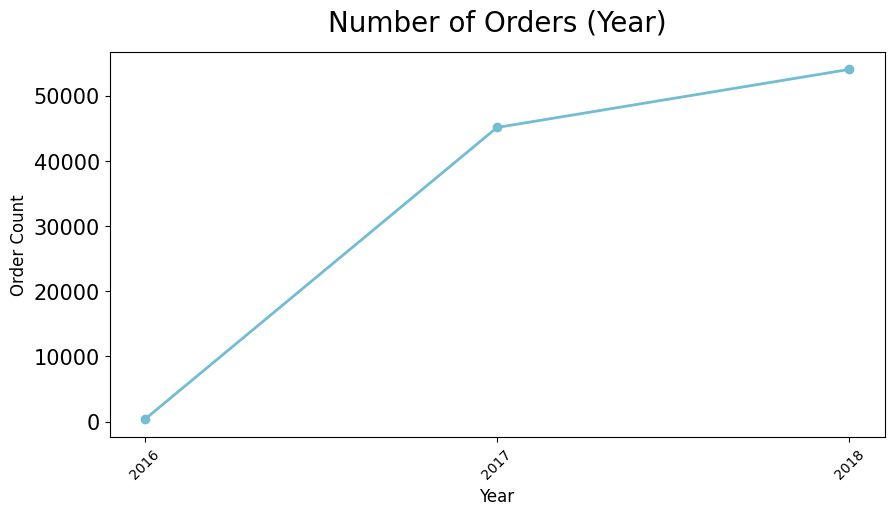

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(
    yearly_orders_df["order_purchase_timestamp"],
    yearly_orders_df["order_count"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Orders (Year)", loc="center", fontsize=20, pad=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Order Count", fontsize=12)
plt.xticks(yearly_orders_df["order_purchase_timestamp"], fontsize=10, rotation = 45)
plt.yticks(fontsize=15)
plt.show()

Menampilkan visualisasi berupa garis yang dhibungkan tiap titiknya dengan menggunakan plt.plot dengan ketentuan-ketentuan yang tertera pada kode.

In [ ]:
monthly_orders_df = orders_df.resample(rule='M', on='order_purchase_timestamp').agg({'order_id':'nunique'})

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')

monthly_orders_df = monthly_orders_df.reset_index()

monthly_orders_df.rename(columns={
  "order_id": "order_count",
}, inplace=True)

monthly_orders_df

,order_purchase_timestamp,order_count
0,2016-09,4
1,2016-10,324
2,2016-11,0
3,2016-12,1
4,2017-01,800
5,2017-02,1780
6,2017-03,2682
7,2017-04,2404
8,2017-05,3700
9,2017-06,3245


Menampilkan dataframe waktu pemesanan yang dilakukan customer dalam rentang tahun-bulan sehingga menggunakan format '%Y-%m' dan menghitung jumlah pesanan tiap tahunnya dengan memanfaatkan order_id, lalu me-replace kolom order_id dengan order_count. Jadi akan menghitung jumlah pesanan tiap bulannya.  

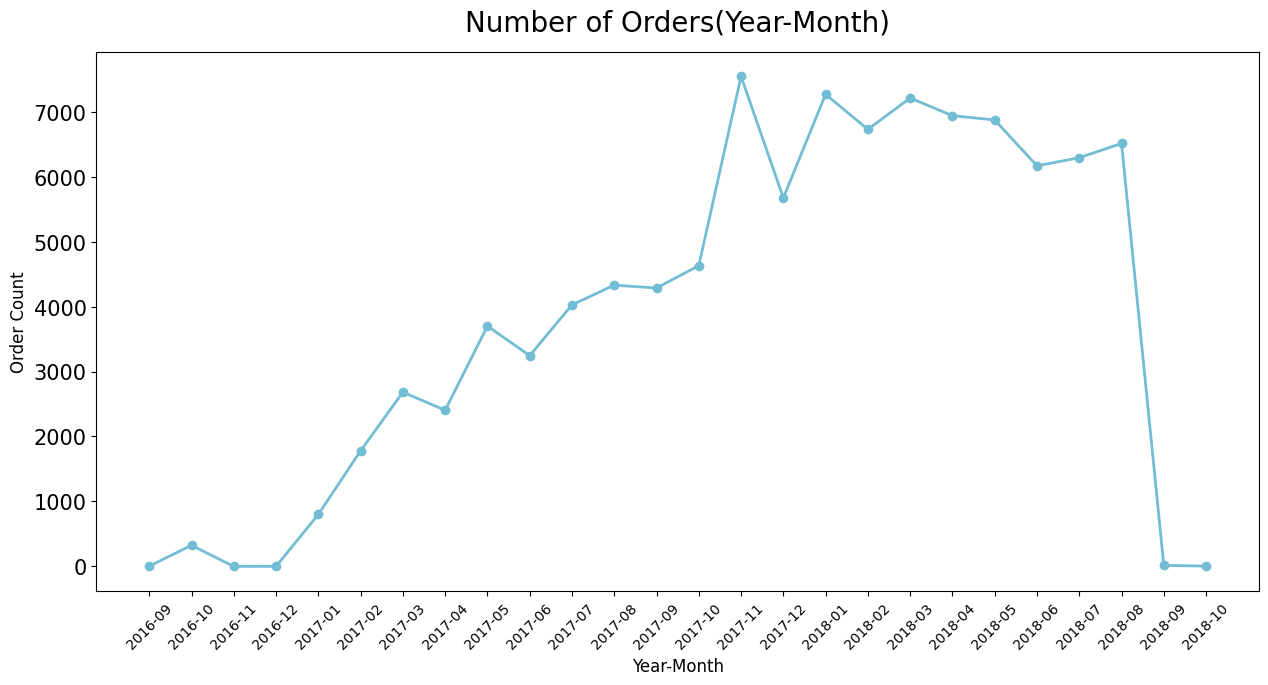

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["order_count"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Orders(Year-Month)", loc="center", fontsize=20, pad=15)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Order Count", fontsize=12)
plt.xticks(monthly_orders_df["order_purchase_timestamp"], fontsize=10, rotation = 45)
plt.yticks(fontsize=15)
plt.show()

Menampilkan visualisasi berupa garis yang dhibungkan tiap titiknya dengan menggunakan plt.plot dengan ketentuan-ketentuan yang tertera pada kode.

### Pertanyaan 2: Kategori produk apa yang paling banyak dipesan?

In [ ]:
count_category_name = pd.DataFrame(combined1_df.groupby("product_category_name")["order_id"].count())

count_category_name = count_category_name.sort_values(by="order_id", ascending=False)

count_category_name.rename(columns={"order_id": "sum_category_product"}, inplace=True)
count_category_name

,sum_category_product
product_category_name,
cama_mesa_banho,12718
beleza_saude,9670
esporte_lazer,8641
moveis_decoracao,8334
informatica_acessorios,7827
...,...
cds_dvds_musicais,14
la_cuisine,14
pc_gamer,9


Membuat dataframe baru bernama count_category_name dengan mengelompokkan berdasarkan kolom "product_catgeory_name", lalu menghitungnya dengan mengguunakan fungsi count() kemudian diurutkan menurun dengan menggunakan (ascending=False). Kemudian me replcae order_id menjadi "sum_category_product".

In [ ]:
count_category_name.head()

,sum_category_product
product_category_name,
cama_mesa_banho,12718
beleza_saude,9670
esporte_lazer,8641
moveis_decoracao,8334
informatica_acessorios,7827


Menampilkan 5 kategori produk yang memiliki jumlah pesanan terbanyak

<ipython-input-261-82e996caa40b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


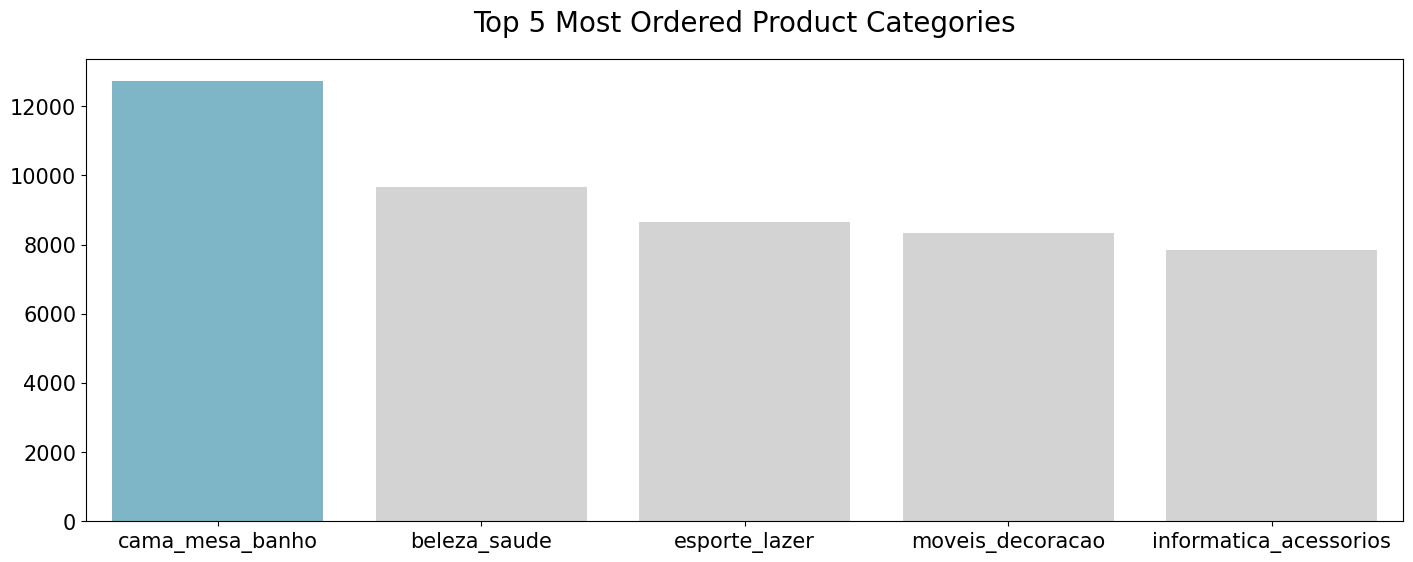

In [ ]:
plt.figure(figsize=(17, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

top_5_data = count_category_name.nlargest(5, "sum_category_product")

sns.barplot(
    x="product_category_name",
    y="sum_category_product",
    data=top_5_data,
    palette=colors
)
plt.title("Top 5 Most Ordered Product Categories", loc="center", fontsize=20, pad=20)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.xticks( fontsize=15)
plt.yticks(fontsize=15)
plt.show()


Menampilkan visualisasi 5 kategori produk yang memiliki jumlah pesanan terbanyak berupa bar/diagram batang dengan menggunakan sns.barplot dengan ketentuan-ketentuan yang tertera pada kode.

### Pertanyaan 3: Kategori produk apa yang memiliki rata-rata skor review terbaik?

In [ ]:
product_category_names = combined2_df['product_category_name'].unique()
average_review_scores = []
category_data =[]
for category_name in product_category_names:
    category_reviews = combined2_df[combined2_df['product_category_name'] == category_name]
    average_review_score = np.mean(category_reviews['review_score'])
    average_review_scores.append(average_review_score)
    category_data.append((category_name, average_review_score))

category_score_dict = dict(zip(product_category_names, average_review_scores))

results_df = pd.DataFrame(category_data, columns=['product_category_name', 'Average Review Score'])

results_df = results_df.sort_values('Average Review Score', ascending=False)
results_df


,product_category_name,Average Review Score
65,cds_dvds_musicais,4.642857
71,fashion_roupa_infanto_juvenil,4.500000
44,livros_interesse_geral,4.446266
69,construcao_ferramentas_ferramentas,4.444444
56,flores,4.419355
...,...,...
19,moveis_escritorio,3.493183
18,pc_gamer,3.333333
64,portateis_cozinha_e_preparadores_de_alimentos,3.266667
39,fraldas_higiene,3.256410


Pertama, mengambil nilai dari nama kategori produk dari combined2_df dan menyimpannya dalam variabel product_category_names. Kemudian dilakukan looping, dengan setiap iterasi itu nantinya akan menghitung rata-rata skor review yang disimpan dalam average_review_score yang selanjutnya ditambahkan pada category_data dengan menggunakan append(). Hasilnya berupan dataframe dari rata-rata skor review yang diurutkan secara menurun menggunakan (ascending=False)

<ipython-input-263-be98e7980cde>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


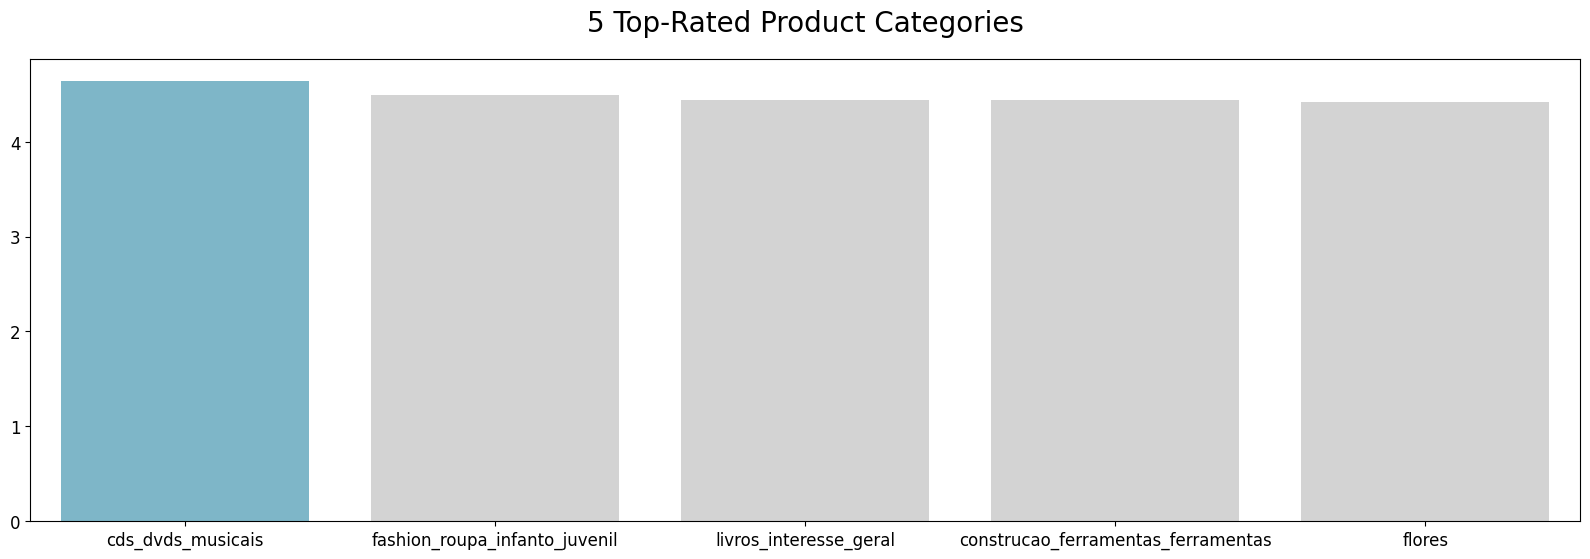

In [ ]:
plt.figure(figsize=(20, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

top_5_data = results_df.nlargest(5, "Average Review Score")

sns.barplot(
    x="product_category_name",
    y="Average Review Score",
    data=top_5_data,
    palette=colors
)
plt.title("5 Top-Rated Product Categories", loc="center", fontsize=20, pad=20)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.xticks( fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Menampilkan visualisasi 5 kategori produk yang memiliki skor review tertinggi berupa bar/diagram batang dengan menggunakan sns.barplot dengan ketentuan-ketentuan yang tertera pada kode.

## Conclusion

- Conclution pertanyaan 1

  Performa customer yang melakukan pemesanan dari tahun ke tahun mengalami peningkatan dengan rinciannya masing-masing yaitu pada tahun 2016 sebanyak 329, tahun 2017 sebanyak 45101, dan tahun 2018 sebanyak 54011 customer melakukan pemesanan. Tetapi untuk jumlah customer yang melakukan pemesanan per bulan tiap tahunnya tidak konsisten bahkan terdapat penurunan yang sangat signifikan pada bulan September 2018

- Conclution pertanyaan 2

  Kategori produk yang paling banyak terjual yaitu cama_mesa_banho dengan jumlah >12000 dipesan dan kategori produk yang paling jarang dipesan yaitu seguros_e_servicos

- Conclution pertanyaan 3

  Dari hasil review yang dilakukan oleh customer, kategori produk yang memiliki rata-rata skor review tertinggi yaitu cds_dvds_musicais dengan rata-rata skor review > 4.64

In [ ]:
all_df = pd.concat([products_df, orders_df, order_items_df, order_reviews_df])
all_df.to_csv("all_data.csv", index=False)